<a href="https://colab.research.google.com/github/daeber1166/proyectoMoA/blob/main/diabetes_participacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import seaborn  as sns
import matplotlib.pyplot as plt
import math
from sklearn.datasets import load_diabetes

# <a id='1'>1.IMPORTACION DE DATOS DIABETES</a>

la columna objetivo seria la degeneracion de la persona un año despues de la enfermedad el probelma entonces es predecir a travez de estas variables o factores que daño tendra el cuerpo con la enfermedad ya prexistente en el cuerpo.

edad edad en años

sexo

índice de masa corporal bmi

presión arterial media pb

s1 tc, células T (un tipo de glóbulos blancos)

s2 ldl, lipoproteínas de baja densidad

s3 hdl, lipoproteínas de alta densidad

s4 tch, hormona estimulante de la tiroides

s5 ltg, lamotrigina

s6 glu, nivel de azúcar en sangre

In [2]:
url='https://raw.githubusercontent.com/daeber1166/proyectoMoA/main/Diabetes1.csv'

en la siguiente linea de codigo se puede observar los datos distribuidas en las variables mencioniadas y se puede observar coherencia como en el genero o la edad 

In [4]:

df = pd.read_csv(url,sep=';')#para que me separe las columnas por ; ya que asi viene el formato en excel 
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,48.598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,38.918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,46.728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,48.903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,42.905,80,135


In [5]:
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,41.336785,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,14.235495,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.912000,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,40.817000,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,44.659000,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,49.345000,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,61.048000,124.000000,346.000000


In [6]:
df.info() #informacion del tipo de dato 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [7]:
df.shape#filas y columnas del dataframe

(442, 11)

In [8]:
df.isnull().sum()#para ver cuantos elementos nulos los sume 

AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64

# <a id='1'>2.ANALISIS DE DATOS</a>

aqui analisamos cada variable y su distribucion por ejemplo hay 25 personas que tiene 50 años que hay muy pocos con 80 años.
predomina por muy poco un genero que el otro.
otro histograma para resaltar es la s5 o lamitrogina este tien muchas muestras formando una campana de gaus en un rango y tiene una separacion muy abrupta entre sus propios datos haciendo que la mayoria de meustras se acumulen en un solo sector.
la glucosa forma una campana de gauss tambien osilando entre los 70 y los 110


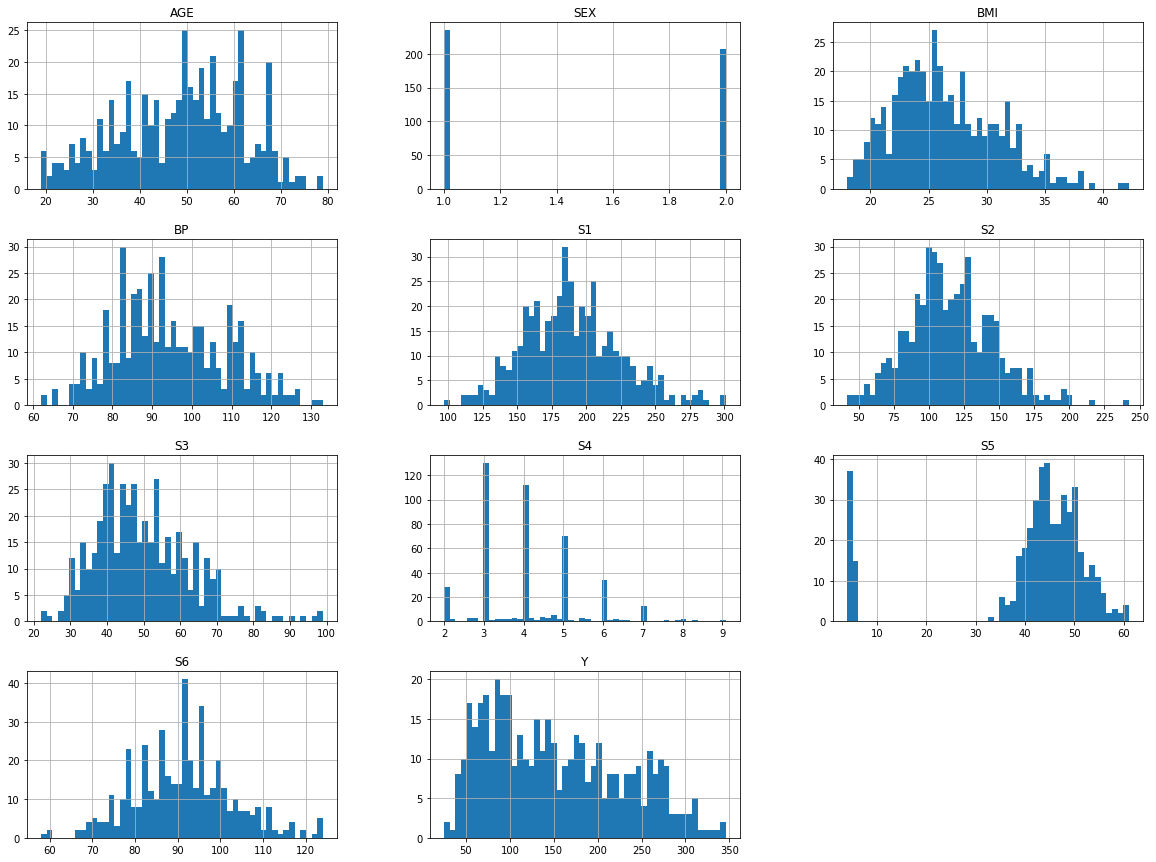

In [9]:
%matplotlib inline 
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [56]:
#df.groupby('Y')['Y'].count().plot(figsize=(40,8),kind='bar')
#plt.title('datos de  el target')

# <a id='1'>3.CORRELACIONES</a>

podemos observar que hay variables que se encuentran en mas correlacion con la DIABETES que otras, entre ellas esta el indice de peso corporal, la hormona tiroides y la presion arterial media.
tambien se debe añadir que en la ultima grafica de correlacion estas variables presentan una pendiente lo que nos indica que  esta correlacion es efectiva.

In [10]:
df_corr=df.corr(method='spearman')


In [11]:
df_corr["Y"].sort_values(ascending=False)

Y      1.000000
BMI    0.561382
S4     0.448931
S5     0.416822
BP     0.416241
S6     0.350792
S1     0.232429
AGE    0.197822
S2     0.195834
SEX    0.037401
S3    -0.410022
Name: Y, dtype: float64

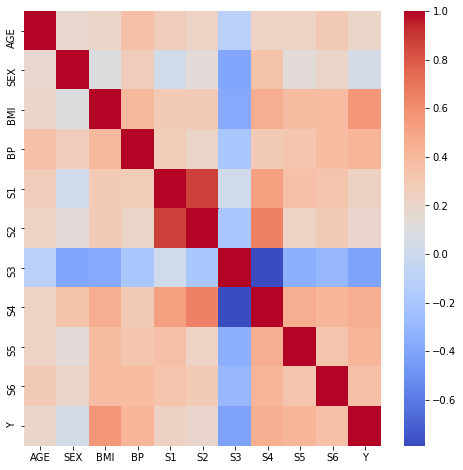

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(df_corr,
            xticklabels=df_corr.columns,
            yticklabels=df_corr.columns,
            cmap='coolwarm'
            ) 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05f5f68b00>,
      dtype=object)

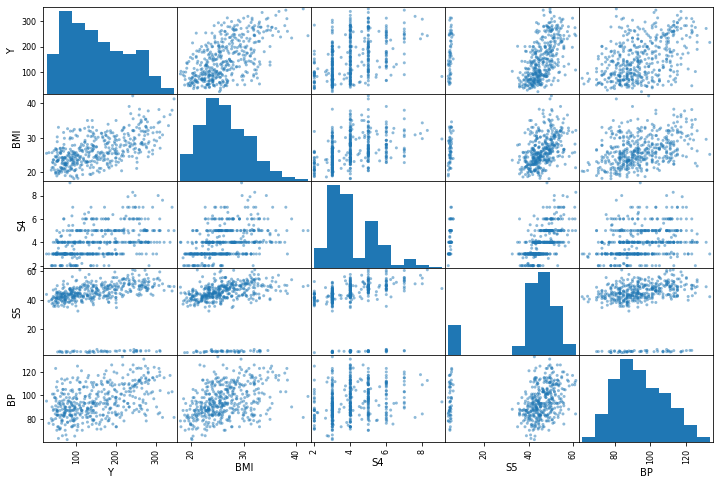

In [13]:
from pandas.plotting import scatter_matrix

attributes=["Y","BMI","S4","S5","BP"]
scatter_matrix(df[attributes], figsize=(12,8))


# <a id='1'>3.DIVISION Y PREPARACION DE DATOS</a>

In [14]:
#ahora para escalar
from sklearn import preprocessing
df_escalado=preprocessing.scale(df)
df_escalado=pd.DataFrame(df_escalado)
df_escalado.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.510656,-0.370989,-0.014719
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-0.170105,-1.938479,-1.001659
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.379146,-0.545154,-0.144580
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.532106,-0.196823,0.699513
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,0.110287,-0.980568,-0.222496


In [15]:
#para separar x y Y
y = df_escalado.drop(df_escalado.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ]], axis='columns')
y=y.rename(columns={'10':'target'})


In [95]:
#planeta.columns=Index(['age', 'sex', 'bmi', 'bp', 's1', 's2','s3','s4','s5','s6','target'], dtype='object')
#planets.columns = ['age', 'sex', 'bmi', 'bp', 's1', 's2','s3','s4','s5','s6','target']
#df_escalado.columns=planets

In [17]:
x=df_escalado.drop(df_escalado.columns[[10]], axis='columns')#borre el target para que tenga el mismo tamañao que el features de skelarn y se puedan poner los nombres de las columnas
diabetes=load_diabetes()
x.columns=diabetes.feature_names# es una funcion que da sklearn para obtner las caracteristicas de su dataset

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20, random_state=42)

In [20]:
x_train.shape

(353, 10)

In [21]:
x_test.shape

(89, 10)

# <a id='1'>4.  MODELO</a>

aqui podemos ver que con un polinomio de grado 3 da un score bueno pero se prueba para saber si se puede mejeor conforme aumenta el grado,aunque si se aumenta mucho puede que l modelo sea muy complejo para el.

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures #esto lo saque de internet de la pagina
from sklearn.linear_model import LinearRegression
# ponemos las funciones
diabetes_pipe_2 = Pipeline([
        ('poly', PolynomialFeatures(2)),
        
        ('reg',LinearRegression ()),
    ])
# ponemos  a nueva variable pipeline y la ponemos a aprender 
# con los datos de entrenamiento ya preparados 
#el score es para obervar como califica el modelo si se acercca a 1 esta bien
diabetes_pipe_2.fit(x_train,y_train)
diabetes_pipe_2.score(x_train,y_train)

0.6093357922812761

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures #esto lo saque de internet de la pagina
from sklearn.linear_model import LinearRegression
# ponemos las funciones
diabetes_pipe_3 = Pipeline([
        ('poly', PolynomialFeatures(3)),
        
        ('reg',LinearRegression ()),
    ])
# ponemos  a nueva variable pipeline y la ponemos a aprender 
# con los datos de entrenamiento ya preparados 
#el score es para obervar como califica el modelo si se acercca a 1 esta bien
diabetes_pipe_3.fit(x_train,y_train)
diabetes_pipe_3.score(x_train,y_train)

0.8615248286328234

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures #esto lo saque de internet de la pagina
from sklearn.linear_model import LinearRegression
# ponemos las funciones
diabetes_pipe_4 = Pipeline([
        ('poly', PolynomialFeatures(4)),
        
        ('reg',LinearRegression ()),
    ])
# ponemos  a nueva variable pipeline y la ponemos a aprender 
# con los datos de entrenamiento ya preparados 
#el score es para obervar como califica el modelo si se acercca a 1 esta bien
diabetes_pipe_4.fit(x_train,y_train)
diabetes_pipe_4.score(x_train,y_train)

1.0

In [30]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

lo evaluamos con una metrica de error y obtenemos desviacion estandar promedio y los scores 

In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(diabetes_pipe_4,x_train,y_train,
                        scoring="neg_mean_squared_error", cv=10)

reg_rmse_scores = np.sqrt(-scores)
display_scores(reg_rmse_scores)

Scores: [ 4.16459933  5.3214863   2.69756376 18.72564973  3.30095665  4.99662829
 13.00468768  6.82881129  5.77956772  7.23627614]
Mean: 7.205622688647521
Standard deviation: 4.709174008726553
